Esse notebook foi feito para fins acadêmicos, então eu retirei insights e funções dos colabs feitos pelo Hayashi, além disso ele foi feito no Google Colab.

# Instalação das bibliotecas

Abaixo foram rodadas todas as bibliotecas utilizadas nesse Colab


In [ ]:
import pandas as pd #utilizada para o banco de dados
import nltk # usada para o pre processamento de PLN
from nltk.corpus import stopwords 
from nltk import tokenize
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt #usada para gráficos
from google.colab import drive #conectar com o drive
drive.mount('/content/drive')
import re



nltk.download('punkt')

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
nltk.download('rslp')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

# Tratamento de dados

No tratamento de dados foram retiradas algumas colunas que achei que não faria sentido para o modelo e eliminei os comentários feitos pelo BTG

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Módulo 6/1.Base Inicial - Sheet1.csv')

In [ ]:
dados

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
0,0,1,btgpactual,"Olá, Ana Paula! Como vai?\n\nSentimos muito pe...",CkG9KXjpY2B,reply,REELS,17949834317264462,17988010663613927,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 15:35:24,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
1,1,2,btgpactual,"Olá, Rosana! Tudo bem?\n\nPara te orientarmos ...",CkG9KXjpY2B,reply,REELS,17968362370910874,17955765434145877,https://www.instagram.com/p/CkG9KXjpY2B/c/1795...,2022-10-25 12:08:06,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
2,2,3,btgpactual,@luizantoniojovinodossan 🚀 💙,CkG9KXjpY2B,reply,REELS,17968676113804345,17868806699792839,https://www.instagram.com/p/CkG9KXjpY2B/c/1786...,2022-10-25 08:16:15,2022-10-25 21:52:54,-1.0,0.0,0.0,-1.0
3,3,4,btgpactual,@ronialencar Boa tarde! Tudo bem?\n\nLamentamo...,CkG9KXjpY2B,reply,REELS,18045922528372377,18327741553009776,https://www.instagram.com/p/CkG9KXjpY2B/c/1832...,2022-10-25 09:39:32,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
4,4,5,btgpactual,"Oi, Nelson! Tudo bem?\n\nPossuímos soluções co...",CkG9KXjpY2B,reply,REELS,17864851241797946,18159475801266342,https://www.instagram.com/p/CkG9KXjpY2B/c/1815...,2022-10-25 09:38:38,2022-10-25 21:52:55,-1.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,4544,3028308,caioaugustofr,"Estão contratando muitos blogueiros, mas eu fi...",Cn4bcg7LM4t,comment,REELS,17965800242039792,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 18:41:35,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4545,4545,3028501,btgpactual,@xubs._ 💙,Cn4bcg7LM4t,reply,REELS,18340331500020596,18014457793513467,https://www.instagram.com/p/Cn4bcg7LM4t/c/1801...,2023-01-26 18:44:27,2023-01-26 19:02:16,-1.0,0.0,0.0,-1.0
4546,4546,3028580,btgpactual,Agradecemos o seu feedback! 💙,CnzSr6ltH74,reply,REELS,18004216693521888,17957000375356996,https://www.instagram.com/p/CnzSr6ltH74/c/1795...,2023-01-26 18:45:13,2023-01-26 19:02:35,-1.0,0.0,0.0,-1.0
4547,4547,3029097,je_mascarenhas,Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼,Cn4bcg7LM4t,comment,REELS,17969884580114389,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 19:26:41,2023-01-26 19:31:45,-1.0,0.0,0.0,-1.0


In [ ]:
dados_filtrados = dados.loc[dados['autor'] != 'btgpactual']
dados_filtrados

,Column1,id,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,URL,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,processado,contemHyperlink
10,10,11,matheusriosortodontia,@gustavopaulinno Realmente. Ja rodei por aí e ...,CkG9KXjpY2B,reply,REELS,17961352247055161,17983688287717831,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-24 17:40:49,2022-10-25 21:52:56,-1.0,0.0,0.0,-1.0
13,13,14,erikacoimbra,👏👏👏,CkG9KXjpY2B,comment,REELS,17943066782219685,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1794...,2022-10-25 19:13:45,2022-10-25 21:52:57,-1.0,0.0,0.0,-1.0
14,14,15,anapaulanakade,"O app está travando desde ontem, está em manut...",CkG9KXjpY2B,comment,REELS,17988010663613927,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1798...,2022-10-25 12:54:54,2022-10-25 21:52:57,-1.0,0.0,0.0,-1.0
15,15,16,rosanakassar,"Abri uma conta, mas achei muito complicado inv...",CkG9KXjpY2B,comment,REELS,17955765434145877,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1795...,2022-10-25 12:03:51,2022-10-25 21:52:58,-1.0,0.0,0.0,-1.0
16,16,17,luizantoniojovinodossan,👏,CkG9KXjpY2B,comment,REELS,17868806699792839,-,https://www.instagram.com/p/CkG9KXjpY2B/c/1786...,2022-10-25 00:30:31,2022-10-25 21:52:58,-1.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,4542,3028275,gui.decicco,Participe da conferência econômica mais import...,Cn5MCVvP1H3,mention,CAROUSEL_ALBUM,17989315081750052,-,https://www.instagram.com/p/Cn5MCVvP1H3/,2023-01-26 18:31:44,2023-01-26 18:35:02,-1.0,0.0,0.0,-1.0
4543,4543,3028307,giballiana,A melhor que temos 🥰🥰,Cn4bcg7LM4t,comment,REELS,17913917285610958,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1791...,2023-01-26 18:47:19,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4544,4544,3028308,caioaugustofr,"Estão contratando muitos blogueiros, mas eu fi...",Cn4bcg7LM4t,comment,REELS,17965800242039792,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 18:41:35,2023-01-26 19:01:29,-1.0,0.0,0.0,-1.0
4547,4547,3029097,je_mascarenhas,Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼,Cn4bcg7LM4t,comment,REELS,17969884580114389,-,https://www.instagram.com/p/Cn4bcg7LM4t/c/1796...,2023-01-26 19:26:41,2023-01-26 19:31:45,-1.0,0.0,0.0,-1.0


## Testes para verificar a importância ou não da retirada de colunas

In [ ]:
dados_filtrados['tipoMidia'].value_counts()

REELS                1525
FEED                 1376
IMAGE                 215
VIDEO                 201
CAROUSEL_ALBUM        184
-                      24
18015162967458592       1
18008430814504778       1
17869519748783145       1
18171016729261171       1
Name: tipoMidia, dtype: int64

In [ ]:
dados_filtrados['probabilidadeAnomalia'].value_counts()

 0.0    3501
-1.0      28
Name: probabilidadeAnomalia, dtype: int64

In [ ]:
dados_filtrados['anomalia'].value_counts()

-1.0    3501
 0.0      28
Name: anomalia, dtype: int64

In [ ]:
dados_filtrados['processado'].value_counts()

0.0    3501
Name: processado, dtype: int64

In [ ]:
dados_filtrados['contemHyperlink'].value_counts()

-1.0    3501
Name: contemHyperlink, dtype: int64

## Retirada das colunas

In [ ]:
dados_filtrados_limpo = dados_filtrados.drop(['Column1', 'URL', 'processado', 'id'], axis=1)
dados_filtrados_limpo

,autor,texto,shortCode,tipoInteracao,tipoMidia,idInteracao,idPai,dataPublicada,dataInsercao,anomalia,probabilidadeAnomalia,contemHyperlink
10,matheusriosortodontia,@gustavopaulinno Realmente. Ja rodei por aí e ...,CkG9KXjpY2B,reply,REELS,17961352247055161,17983688287717831,2022-10-24 17:40:49,2022-10-25 21:52:56,-1.0,0.0,-1.0
13,erikacoimbra,👏👏👏,CkG9KXjpY2B,comment,REELS,17943066782219685,-,2022-10-25 19:13:45,2022-10-25 21:52:57,-1.0,0.0,-1.0
14,anapaulanakade,"O app está travando desde ontem, está em manut...",CkG9KXjpY2B,comment,REELS,17988010663613927,-,2022-10-25 12:54:54,2022-10-25 21:52:57,-1.0,0.0,-1.0
15,rosanakassar,"Abri uma conta, mas achei muito complicado inv...",CkG9KXjpY2B,comment,REELS,17955765434145877,-,2022-10-25 12:03:51,2022-10-25 21:52:58,-1.0,0.0,-1.0
16,luizantoniojovinodossan,👏,CkG9KXjpY2B,comment,REELS,17868806699792839,-,2022-10-25 00:30:31,2022-10-25 21:52:58,-1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4542,gui.decicco,Participe da conferência econômica mais import...,Cn5MCVvP1H3,mention,CAROUSEL_ALBUM,17989315081750052,-,2023-01-26 18:31:44,2023-01-26 18:35:02,-1.0,0.0,-1.0
4543,giballiana,A melhor que temos 🥰🥰,Cn4bcg7LM4t,comment,REELS,17913917285610958,-,2023-01-26 18:47:19,2023-01-26 19:01:29,-1.0,0.0,-1.0
4544,caioaugustofr,"Estão contratando muitos blogueiros, mas eu fi...",Cn4bcg7LM4t,comment,REELS,17965800242039792,-,2023-01-26 18:41:35,2023-01-26 19:01:29,-1.0,0.0,-1.0
4547,je_mascarenhas,Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼,Cn4bcg7LM4t,comment,REELS,17969884580114389,-,2023-01-26 19:26:41,2023-01-26 19:31:45,-1.0,0.0,-1.0


In [ ]:
dados_filtrados_limpo['texto']

10      @gustavopaulinno Realmente. Ja rodei por aí e ...
13                                                    👏👏👏
14      O app está travando desde ontem, está em manut...
15      Abri uma conta, mas achei muito complicado inv...
16                                                      👏
                              ...                        
4542    Participe da conferência econômica mais import...
4543                                A melhor que temos 🥰🥰
4544    Estão contratando muitos blogueiros, mas eu fi...
4547                           Arrasa Micaaa 💙✨🙏🏼👏🏼👏🏼👏🏼👏🏼
4548                                        Excelência! 👏
Name: texto, Length: 3653, dtype: object

# Testes isolados usando a biblioteca


Abaixo eu fiz os testes isolados de acordo com a atividade ponderada da semana 2 

## Tokenização

In [ ]:
#Aqui estou utilizando a biblioteca do próprio nltk para tokenizar os post, e especifico no final que é para ser na língua portuguesa

texto_teste = "Sou do grupo BTG3, no curso de Sistemas de Informação!"

texto_tokenizado = tokenize.word_tokenize(texto_teste, language='portuguese')  
texto_tokenizado

['Sou',
 'do',
 'grupo',
 'BTG3',
 ',',
 'no',
 'curso',
 'de',
 'Sistemas',
 'de',
 'Informação',
 '!']

## Remoção de stop words


In [ ]:
#para não utilizar a biblioteca eu criei uma lista de stopwords (peguei a lista do github) e adicionei algumas que nos post estão com letras maisculas para serem removidas

stopwords = [
'A', 'É', 'Para', 'As', 'Os', 'Por', 'E',
'de', 'a',
'o', 'que', 'e', 
'do', 'da', 'em', 
'um', 'para', 'é', 
'com', 'não', 'uma', 
'os', 'no', 'se', 'na', 
'por', 'mais', 'as', 'dos', 
'como', 'mas', 'foi', 'ao',
 'ele', 'das', 'tem ','à',
'seu','sua','ou' ,
'ser' ,'quando', 
'muito' ,'há' ,
'nos' ,'já' ,
'está','eu' ,
'também','só' ,
'pelo', 'pela' ,
'até' ,'isso' ,
'ela' ,'entre', 
'era' ,'depois', 
'sem','mesmo', 
'aos' ,'ter' ,
'seus' ,'quem' ,
'nas' ,'me' ,
'esse','eles' ,
'estão','você' ,
'tinha' ,'foram' ,
'essa' ,'num',
'nem' ,'suas' ,
'meu' ,'às' ,
'minha','têm' ,
'numa' ,'pelos' ,
'elas' ,'havia' ,
'seja' ,'qual' ,
'será' ,'nós' ,
'tenho','lhe' ,
'deles','essas' ,
'esses' ,'pelas' ,
'este' ,'fosse' ,
'dele' ,'tu' ,
'te' ,'vocês' ,
'vos','lhes',
'meus','minhas',
'teu' ,'tua',
'teus','tuas',
'nosso','nossa',
'nossos','nossas',
'dela','delas',
'esta','estes',
'estas','aquele',
'aquela','aqueles',
'aquelas','isto','aquilo']


In [ ]:
texto_tokenizado_stopwords = [] # aqui eu defino uma lista para dar o print depois

for word in texto_tokenizado:
    if word not in stopwords:
        texto_tokenizado_stopwords.append(word)
# acima eu defino que caso dentro daquela frase tenha uma das stopwords que está na lista, tem que ser removida
texto_tokenizado_stopwords

['Sou', 'grupo', 'BTG3', ',', 'curso', 'Sistemas', 'Informação', '!']

## Stemming


In [ ]:
texto_tokenizado_stopwords_stemming = [] # aqui eu defino uma lista para dar o print depois

for word in texto_tokenizado_stopwords:
    texto_tokenizado_stopwords_stemming.append([stemmer.stem(word)])
#acima eu defino que as palavras devem voltar a sua raiz

texto_tokenizado_stopwords_stemming

[['sou'],
 ['grupo'],
 ['btg3'],
 [','],
 ['curso'],
 ['sistema'],
 ['informação'],
 ['!']]

# Definição de funções

In [ ]:
def tokenizar(texto):
  if isinstance(texto, str):
      tokens = nltk.word_tokenize(texto)
      return tokens
  else:
      return []

In [ ]:
def remover_stop_words(tokens):
    tokens_stopwords = []
    for word in tokens:
        if word not in stopwords:
            tokens_stopwords.append(word)
    return tokens_stopwords

In [ ]:
def remover_pontuacao(tokens_stopwords):
    tokens_sem_pontuacao = []
    for token in tokens_stopwords:
        token_sem_pontuacao = re.sub(r'[^\w\s]', '', token)
        if token_sem_pontuacao != '':
            tokens_sem_pontuacao.append(token_sem_pontuacao)
    return tokens_sem_pontuacao

# Testes das funções


In [ ]:
teste_tokens = "Sou do grupo BTG3, no curso de Sistemas de Informação!"
teste_tokens_feito = tokenizar(teste_tokens)
print(teste_tokens_feito)

['Sou', 'do', 'grupo', 'BTG3', ',', 'no', 'curso', 'de', 'Sistemas', 'de', 'Informação', '!']


In [ ]:
teste_tokens_stopwords = remover_stop_words(teste_tokens_feito)
print(teste_tokens_stopwords)

['Sou', 'grupo', 'BTG3', ',', 'curso', 'Sistemas', 'Informação', '!']


In [ ]:
teste_tokens_stopwords_pontuacao = remover_pontuacao(teste_tokens_stopwords)
print(teste_tokens_stopwords_pontuacao)

['Sou', 'grupo', 'BTG3', 'curso', 'Sistemas', 'Informação']


# Pipeline

In [ ]:
def pipeline(comentario):
      tokens_pipeline = tokenizar(comentario)
      tokens_stopwords_pipeline = remover_stop_words(tokens_pipeline)
      tokens_stopwords_pontuacao_pipeline = remover_pontuacao(tokens_stopwords_pipeline)
      return tokens_stopwords_pontuacao_pipeline

# Gráficos

## Criação de colunas para os gráficos

In [ ]:
dados_filtrados_limpo['texto_tokenizado'] = dados_filtrados_limpo['texto'].apply(tokenizar)
dados_filtrados_limpo

In [ ]:
dados_filtrados_limpo['texto_stop_words'] = dados_filtrados_limpo['texto_tokenizado'].apply(remover_stop_words)
dados_filtrados_limpo

In [ ]:
dados_filtrados_limpo['texto_pontuacao'] = dados_filtrados_limpo['texto_stop_words'].apply(remover_pontuacao)
dados_filtrados_limpo

## Plotagem de gráficos

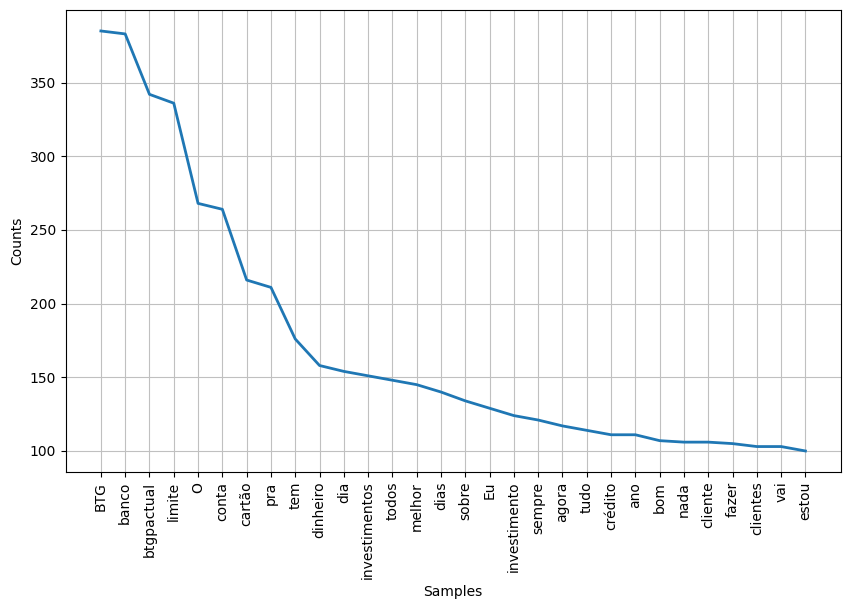

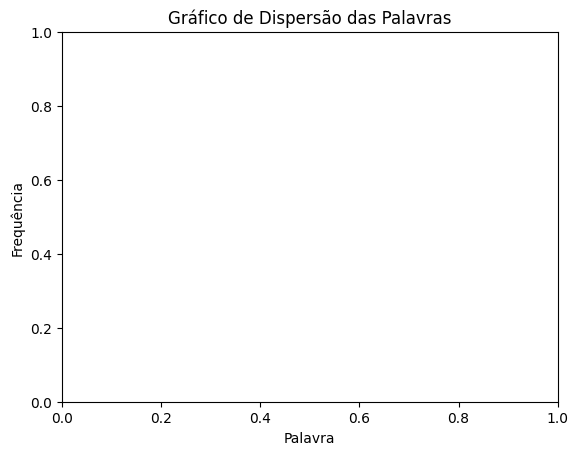

In [ ]:
# Criação de uma lista com todas as palavras
all_words = [word for tokens in dados_filtrados_limpo['texto_pontuacao'] for word in tokens]

# Plotagem do gráfico de dispersão
plt.figure(figsize=(10, 6))
nltk.FreqDist(all_words).plot(30)
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.title('Gráfico de Dispersão das Palavras')
plt.show()


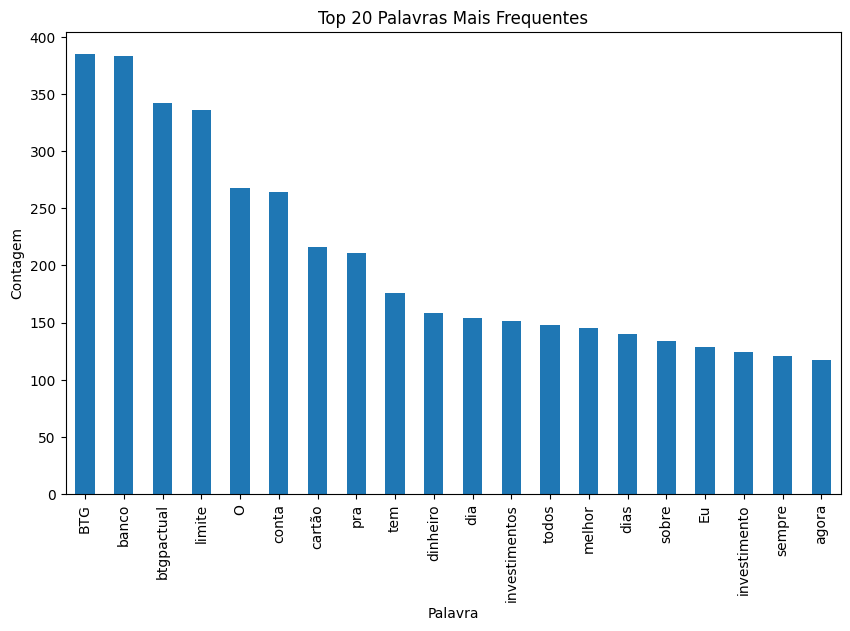

In [ ]:
# Contagem de palavras
word_counts = dados_filtrados_limpo['texto_pontuacao'].explode().value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
word_counts.head(20).plot(kind='bar')
plt.xlabel('Palavra')
plt.ylabel('Contagem')
plt.title('Top 20 Palavras Mais Frequentes')
plt.show()


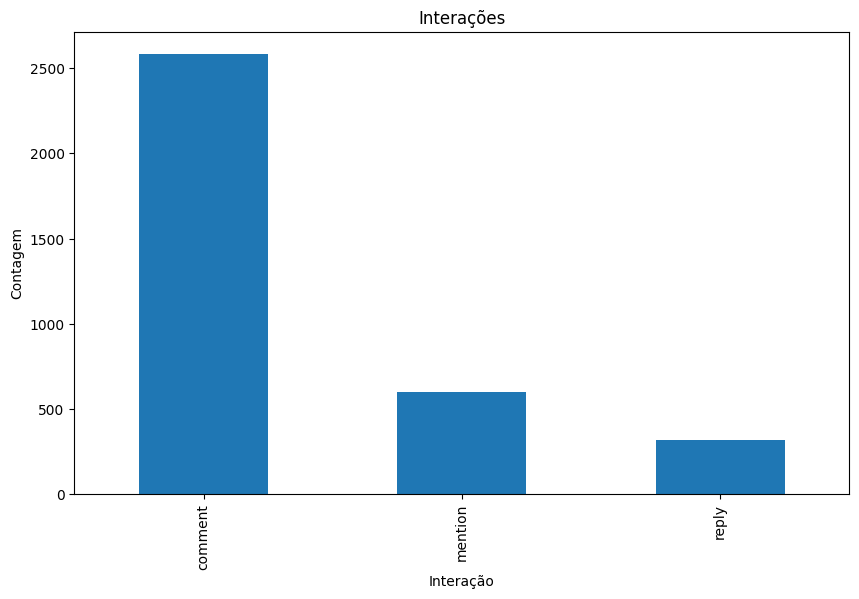

In [ ]:
# Contagem de palavras
interacao_counts = dados_filtrados_limpo['tipoInteracao'].explode().value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
interacao_counts.head(3).plot(kind='bar')
plt.xlabel('Interação')
plt.ylabel('Contagem')
plt.title('Interações')
plt.show()

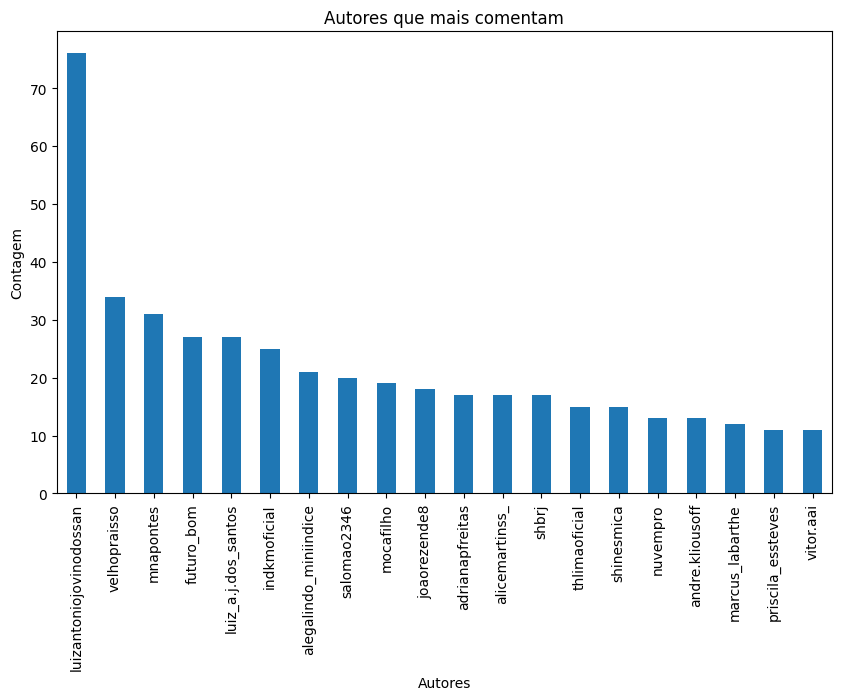

In [ ]:
# Contagem de palavras
autor_counts = dados_filtrados_limpo['autor'].explode().value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
autor_counts.head(20).plot(kind='bar')
plt.xlabel('Autores')
plt.ylabel('Contagem')
plt.title('Autores que mais comentam')
plt.show()

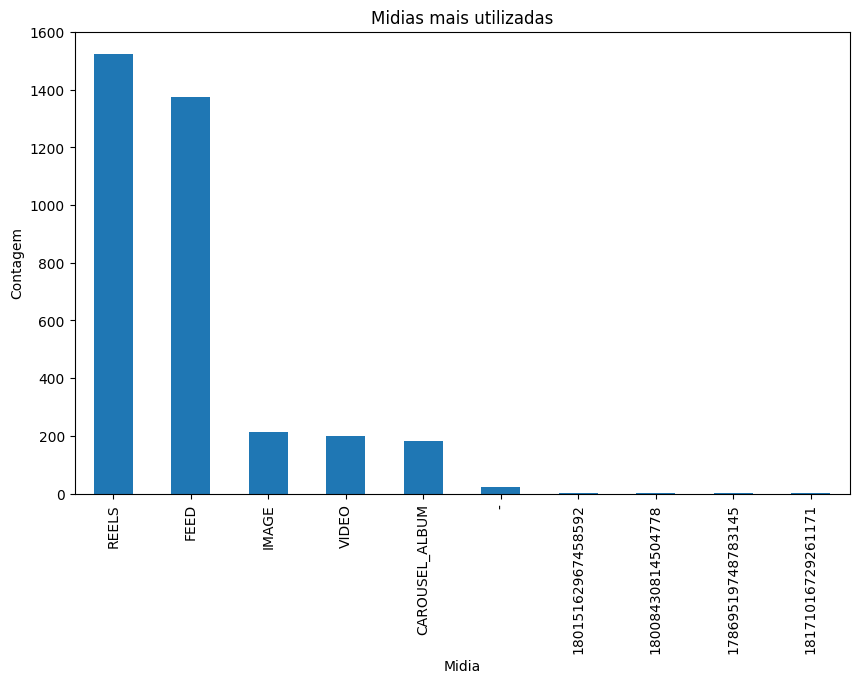

In [ ]:
# Contagem de palavras
midia_counts = dados_filtrados_limpo['tipoMidia'].explode().value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
midia_counts.head(20).plot(kind='bar')
plt.xlabel('Midia')
plt.ylabel('Contagem')
plt.title('Midias mais utilizadas')
plt.show()